# 常用图表的绘制

## 1 绘制折线图

折线图可以显示随时间而变化的连续数据，因此非常适用于显示时间间隔下数据的趋势。如基础体温曲线图、学生成绩走势图、股票月成交量走势图、月销售统计分析图、微博、公众号、网站访问量统计图等，都可以用折线图体现。

在折线图中，类别数据沿水平轴均匀分布，所有值的数据沿垂直轴均匀分布。

Matplotlib绘制折线图主要使用plot函数。如何绘制多折线图。

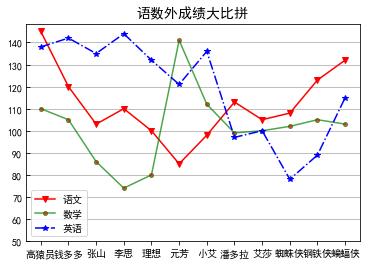

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data.xls') # 导入Excel文件
# 多折线图
x = df1['姓名']
y1 = df1['语文']
y2 = df1['数学']
y3 = df1['英语']

plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文乱码
plt.rcParams['xtick.direction'] = 'out' #刻度线向外
plt.rcParams['ytick.direction'] = 'in' #刻度线向内
plt.title('语数外成绩大比拼',fontsize=14)
plt.plot(x,y1,label='语文',color='r',marker='v')
plt.plot(x,y2,label='数学',color='g',marker='.',mfc='r',ms=8,alpha=0.7)
plt.plot(x,y3,label='英语',color='b',linestyle='-.',marker='*')
plt.grid(axis='y') #显示网格关闭y轴
plt.ylabel='成绩'
plt.yticks(range(50,150,10))
plt.legend(['语文','数学','英语'])
#plt.show()




注意：
* mfc：标记的颜色
* ms:  标记的大小
* mec：标记边框的颜色
* alpha: 透明度，设置该参数可以改变颜色的深浅。

## 2 绘制柱形图

柱形图，又称长条图、柱状图、条状图等，是一种以长方形的长度为变量的统计图表。柱形图用来比较两个或以上的数据（不同时间或者条件），只有一个变量，通常利用于较小的数据集分析。Matplotlib绘制柱形图时使用bar函数，语法如下：

matplotlib.pyplot.bar(x,height,width,bottom=None,*** *,align='center',data=None,*****kwargs)

参数说明：
* x : x轴数据
* height:柱子的高度，也就是y轴的数据
* width: 浮点型，柱子的宽度，默认值为0.8，可以指定固定值
* bottom: 标量或数组，可选参数，柱形图的y坐标,默认值为0
* ‘*’: 星号本身不是参数。星号表示其后面的参数为命名关键字参数，命名关键字参数必须传入参数名，否则程序会出现错误。
* align:对齐方式，如center(居中),edge(边缘)，默认值为center
* data: data关键字参数。如果给定一个数据参数，所有位置和关键字参数将被替换
* **kwargs:关键字参数，其它可选参数，如color(颜色)、alpha(透明度)、label(每个柱子显示的标签)等。

绘制简单的柱形图

<BarContainer object of 6 artists>

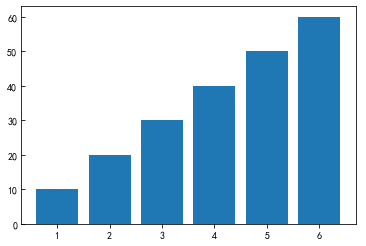

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1,2,3,4,5,6]
height = [10,20,30,40,50,60]
plt.bar(x,height)
#plt.show()

bar函数可以绘制出各种类型的柱形图，如基本柱形图、多柱形图、堆叠柱形图等

###  2.1 基本柱形图


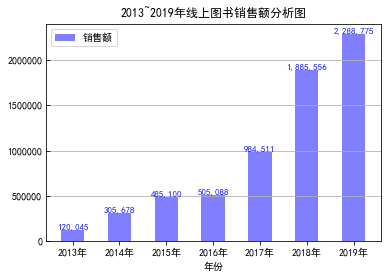

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx')
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文乱码
plt.rcParams['axes.unicode_minus'] = False
x = df['年份']
height = df['销售额']
plt.grid(axis='y', which='major')#which???

plt.xlabel('年份')
#plt.ylabel('总额')

plt.title('2013~2019年线上图书销售额分析图')
plt.bar(x,height,width=0.5,align='center',color='b',alpha=0.5)
for a ,b  in zip(x,height):
    plt.text(a,b,format(b,','),ha='center',va='bottom',fontsize=9,color='b',alpha=0.9)
plt.legend(['销售额'])
#plt.show()

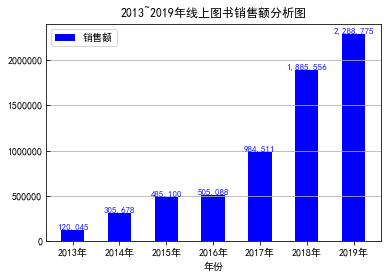

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx')
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文乱码
plt.rcParams['axes.unicode_minus'] = False
x = df['年份']
height = df['销售额']
plt.grid(axis='y', which='major')#which???

plt.xlabel('年份')
#plt.ylabel('金额')#注意中英文符号

plt.title('2013~2019年线上图书销售额分析图')
plt.bar(x,height,width=0.5,align='center',color='b')#注意这里少了透明度
for a ,b  in zip(x,height):
    plt.text(a,b,format(b,','),ha='center',va='bottom',fontsize=9,color='b',alpha=0.9)#format(b,',')表示千分位
plt.legend(['销售额'])
#plt.show()

### 2.2 绘制多柱形图

对于线上图书销售额的统计，如果要统计各个平台的销售额，可以使用多柱形图，不同颜色的柱子代表不同的平台，如京东、天猫、自营等。

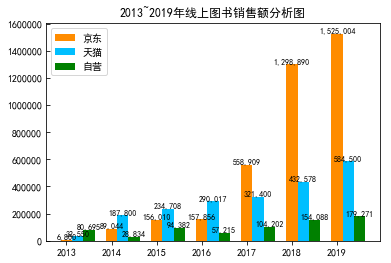

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx',sheet_name='Sheet2')
plt.rcParams['font.sans-serif'] = ['SimHei']  #解决中文乱码
x =  df['年份']
y1 = df['京东']
y2 = df['天猫']
y3 = df['自营']
width = 0.25

#y轴标签
#plt.ylabel('线上销售金额')
#图表标题
plt.title('2013~2019年线上图书销售额分析图')
plt.bar(x,y1,width=width,color='darkorange')
plt.bar(x+width,y2,width=width,color='deepskyblue')
plt.bar(x+2*width,y3,width=width,color='g')

#设置每个柱子的文本标签，format(b,',')格式化为千分位分隔符格式
for a,b in zip(x,y1):
    plt.text(a,b,format(b,','),ha='center',va='bottom',fontsize=8)
for a,b in zip(x,y2):
    plt.text(a+width,b,format(b,','),ha='center',va='bottom',fontsize=8)
for a,b in zip(x,y3):
    plt.text(a+2*width,b,format(b,','),ha='center',va='bottom',fontsize=8)
plt.legend(['京东','天猫','自营']) #图例
#plt.show()

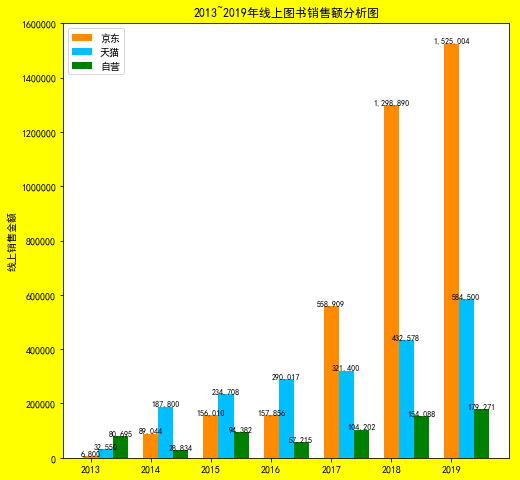

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
pig = plt.figure(figsize=(8,8),facecolor='yellow')
df = pd.read_excel('books.xlsx',sheet_name='Sheet2')
plt.rcParams['font.sans-serif'] = ['SimHei']  #解决中文乱码
x =  df['年份']
y1 = df['京东']
y2 = df['天猫']
y3 = df['自营']
width = 0.25

#y轴标签
plt.ylabel('线上销售金额')
#图表标题
plt.title('2013~2019年线上图书销售额分析图')
plt.bar(x,y1,width=width,color='darkorange')
plt.bar(x+width,y2,width=width,color='deepskyblue')
plt.bar(x+2*width,y3,width=width,color='g')

#设置每个柱子的文本标签，format(b,',')格式化为千分位分隔符格式
for a,b in zip(x,y1):
    plt.text(a,b,format(b,','),ha='center',va='bottom',fontsize=8)
for a,b in zip(x,y2):
    plt.text(a+width,b,format(b,','),ha='center',va='bottom',fontsize=8)
for a,b in zip(x,y3):
    plt.text(a+2*width,b,format(b,','),ha='center',va='bottom',fontsize=8)
plt.legend(['京东','天猫','自营']) #图例
plt.show()

## 3 绘制直方图

直方图，又称质量分布图，由一系列高度不等的纵向条纹或线段表示数据分布情况。一般用横轴表示数据类型，纵轴表示分布情况。直方图是数值数据分布的精确图形表示，是一个连续变量（定量变量）的概率分布len估计。

绘制直方图主要使用hits函数，语法如下：

matplotlib.pyplot.hits(x,bins=None,range=None,density=None,bottom=None,histtype='bar',align='mid',log=False,color=None,label=None,stacked=False,normed=None)

参数说明：
* x: 数据集，最终的直方图将对数据集进行统计。
* bins: 统计数据的区间分布。
* range: 元组类型，显示的区间。
* density:布尔型，默认值为False，频数统计结果，为True则显示频率统计结果，这里需要注意：频率统计结果=区间数目/(总数X区间宽度)
* histtype:可选参数，设置值为bar、barstacked、step或stepfilled,默认值为bar,推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar参数类似。
* align:可选参数，值为left、mid或right，默认值为mid,控制柱状图的水平分布，left或者right,会有部分的空白区域，推荐使用默认值。
* log: 布尔型，默认值为False,即y坐标轴是否选择指数刻度。
* stacked: 布尔型，默认值为False,否则为堆积状图

(array([5., 3., 5., 2.]),
 array([  0,  25,  50,  75, 100]),
 <a list of 4 Patch objects>)

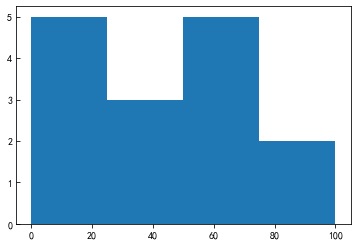

In [11]:
#绘制简单直的方图

import matplotlib.pyplot as plt
%matplotlib inline
x = [22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]
plt.hist(x,bins=[0,25,50,75,100])
#plt.show()


(array([ 1.,  4., 15., 31.,  7.,  0.]),
 array([  0,  25,  50,  75, 100, 125, 150]),
 <a list of 6 Patch objects>)

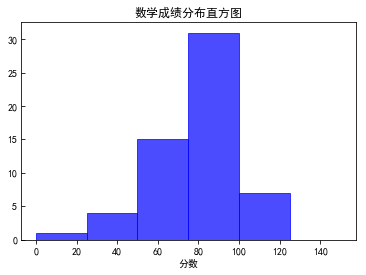

In [13]:
# 使用直方图分析学生数学成绩分布情况
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('grade1.xls')
plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码
x = df['得分']
plt.xlabel('分数')
#plt.ylabel('学生数量')
#显示图标题
plt.title('数学成绩分布直方图')

plt.hist(x,bins=[0,25,50,75,100,125,150],facecolor='blue',edgecolor='blue',alpha=0.7)



通过直方图还可以分析以下内容：

* 对学生得成绩进行比较
呈正态分布的测验便于选拔优秀学生，通过直方图一目了然。

* 确定人数和分数线

* 测验试题难度

练一练：

(array([4., 6., 1., 1., 1.]),
 array([36. , 36.2, 36.4, 36.6, 36.8, 37. ]),
 <a list of 5 Patch objects>)

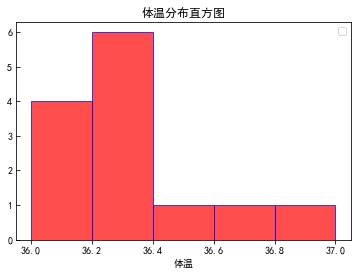

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('体温.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']

x = df['体温']
plt.xlabel('体温')
plt.title('体温分布直方图')

plt.hist(x,bins=[36.0,36.2,36.4,36.6,36.8,37.0],facecolor='red',edgecolor='blue',alpha=0.7)


## 4 绘制饼形图

饼形图常用来表示各个部分在整体所占的比例。

Matplotlib绘制饼形图主要使用pie函数，如法如下：

matplotlib.pypolt.pie(x,explode=None,labels=None,colors=None,autopct=None,pctdistance=0.6,shadow=False, labeldistance=1.1,startangle=None,radius=None,countclock=True,wedgeprops=None,textprops=None,center=(0,0),frame=False,rotatelabels=False,hold=None,data=None)

参数说明：
* x: 每一块饼形图的比例，如果sum(x)>1会使用sum(x)进行归一化。
* labels:每一块饼图外侧显示的说明文字
* explode:每一块饼形图离中心的距离
* startangle:起始绘制角度，默认是从x轴正方向逆时针画起，如设置值为90，则从y轴正方向画起
* shadow:在饼形图下面画一个阴影，默认值为False,即不画阴影。
* labeldistance: 标记的绘制的位置，相对于半径的比例，默认值为1.1，如<1，则绘制在饼图内侧。
* autopct:设置饼图百分比，可以使用格式化字符串或format函数。如'%1.1f'保留小数点的后1位
* pctdistance:类似于labeldistance参数，指定百分比的位置刻度，默认值位0.6
* radius : 饼图半径，默认值为1.
* counterclock: 指定指针方向，布尔型，可选参数，默认值为True,表示逆时针；如果值为False,则表示顺时针。
* wedgeprops:字典类型，可选参数，默认值为None,字典传递给wedge对象用来画一个饼图。例如wedgeprops={'linewidth':2}设置wedge线宽为2
* textprops: 设置标签和比例和比例文字的格式，字典类型，可选参数，默认值为None。传递给text对象的字典参数。
* center:浮点类型的列表，可选参数，默认值为（0，0），表示图表中心位置。
* frame：布尔型，可选参数，默认值为False，不显示轴框架（也就是网格）;如果值为True，则显示轴框架，与grid函数配合使用。在实际应用中建议使用默认值，显示轴框架会干扰饼形图效果。
* rotatelabels:布尔型，可选参数，默认值为False；如果值为True，则旋转到每一个标签到指定的角度。

绘制简单的饼形图

([<matplotlib.patches.Wedge at 0x2112f6020f0>,
 [Text(1.0978294013681003, 0.06906956994045162, ''),
  Text(1.056323054388303, 0.3068902161486517, ''),
  Text(0.7530018217768821, 0.8018654852284746, ''),
  Text(-1.065441491584454, -0.2735588200191946, ''),
  Text(0.8899186347901604, -0.6465638587589142, ''),
  Text(1.056323029246806, -0.30689030268623974, '')],
 [Text(0.5988160371098727, 0.03767431087660997, '2.0%'),
  Text(0.5761762114845289, 0.16739466335380998, '5.0%'),
  Text(0.4107282664237538, 0.43738117376098606, '12.0%'),
  Text(-0.5811499045006112, -0.1492139018286516, '70.0%'),
  Text(0.48541016443099655, -0.3526711956866804, '2.0%'),
  Text(0.5761761977709849, -0.16739471055613073, '9.0%')])

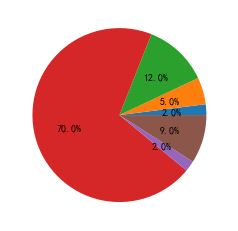

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [2,5,12,70,2,9]
plt.pie(x,autopct='%1.1f%%')


饼形图也存在各种类型，主要包括基础饼形图、分裂饼形图、立体感带阴影的饼形图、环形图等

### 4.1 基础饼形图

Text(0.5, 1.0, '销量占比情况分析')

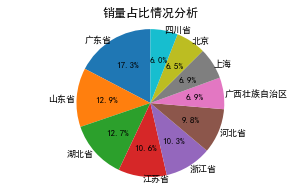

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',
        startangle=90,
        radius=0.5,
        center=(0.2,0.2),
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

Text(0.5, 1.0, '销量占比情况分析')

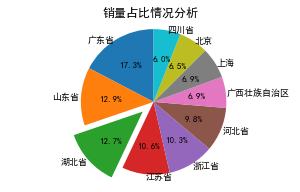

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        startangle=90,       # 设置饼图的初始角度
        radius=0.5,          #设置饼图的圆点
        center=(0.2,0.2),    #设置文本标签的属性值
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6,     #设置百分比标签与圆心的距离
        explode=(0,0,0.1,0,0,0,0,0,0,0)
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

### 4.2 分裂饼形图

分裂饼形图是将认为主要的饼形图部分分裂出来，以达到突出显示的目的。分裂饼形图可以同时分裂多块。分裂饼形图主要通过explode参数实现，该参数用于设置饼形图距中心的距离，我们需要将哪块分裂出来，就设置它与中心的距离即可。

例如：上图有10块饼形图，我们将占比最多的“广东省”分裂出来，广东省放在第一位，那么就设置第一位距中心的距离为0.1，其它设置为0.

 explode=(0.1,0,0,0,0,0,0,0,0,0)



Text(0.5, 1.0, '销量占比情况分析')

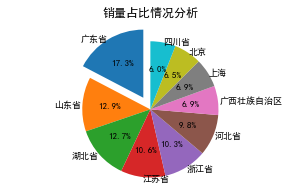

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        startangle=90,       # 设置饼图的初始角度
        radius=0.5,          #设置饼图的圆点
        center=(0.2,0.2),    #设置文本标签的属性值
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6,     #设置百分比标签与圆心的距离
        explode=(0.1,0,0,0,0,0,0,0,0,0)
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

Text(0.5, 1.0, '销量占比情况分析')

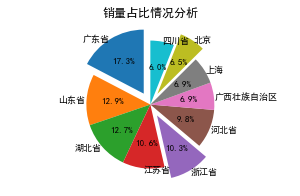

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        startangle=90,       # 设置饼图的初始角度
        radius=0.5,          #设置饼图的圆点
        center=(0.2,0.2),    #设置文本标签的属性值
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6,     #设置百分比标签与圆心的距离
        explode=(0.1,0,0,0,0.1,0,0,0,0.1,0)
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

### 4.3 立体感带阴影的饼形图

立体感带阴影的饼形图主要通过shadow参数实现，设置该参数值为True即可

shadow=True

Text(0.5, 1.0, '销量占比情况分析')

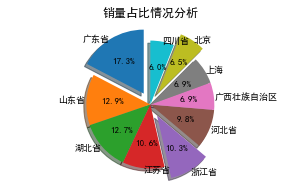

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        startangle=90,       # 设置饼图的初始角度
        radius=0.5,          #设置饼图的圆点
        center=(0.2,0.2),    #设置文本标签的属性值
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6,     #设置百分比标签与圆心的距离
        explode=(0.1,0,0,0,0.1,0,0,0,0.1,0),
        shadow=True
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

### 4.4 环形图
环形图是由两个及两个以上大小不一的饼形图叠在一起，去除中间的部分所构成的图形。通过pie函数实现，一个关键参数wedgeprops,字典类型，用于设置饼形图内外边界的属性，如环的宽度、环边界颜色和宽度。

wedgeprops={'width':0.2,'edgecolor':'k'},

Text(0.5, 1.0, '销量占比情况分析')

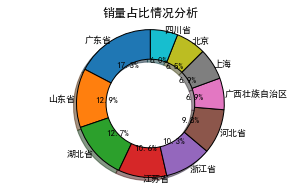

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        labels=labels,
        labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        startangle=90,       # 设置饼图的初始角度
        radius=0.5,          #设置饼图的圆点
        center=(0.2,0.2),    #设置文本标签的属性值
        textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.6,     #设置百分比标签与圆心的距离
        explode=(0,0,0,0,0,0,0,0,0,0),
        wedgeprops={'width':0.2,'edgecolor':'k'},
        shadow=True
       )
plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
plt.title('销量占比情况分析')

### 4.5 内嵌环形图

绘制内嵌环形图实际是双环形图。

绘制内嵌环形图需要注意以下三点:
* （1） 连续使用两次pie函数。
* （2） 通过wedgeprops参数设置环形边界。
* （3） 通过radius参数设置不同的半径。

为了使得图例能够正常显示，图例代码中引入了两个主要参数：
* frameon参数设置图例有无边框；
* bbox_to_anchor参数设置图例位置。

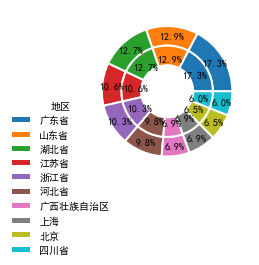

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_excel('data2.xls')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(5,3))
labels = df1['省']
sizes = df1['销量']
sizes1 = df1['销量']
#设置饼形图每块的颜色
colors=['red','yellow','slateblue','green','magenta','cyan','darkorange','lawngreen','pink','gold']
plt.pie(sizes,
        #labels=labels,
        #labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        #startangle=90,       # 设置饼图的初始角度
        radius=1,          #设置饼图的圆点
       # center=(0.2,0.2),    #设置文本标签的属性值
        #textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.85,     #设置百分比标签与圆心的距离
        #explode=(0,0,0,0,0,0,0,0,0,0),
        wedgeprops=dict(linewidth=2,width=0.3,edgecolor='w')
        
       )
#plt.axis('equal') # 设置x,y轴刻度一致，保证饼形图为圆形
#plt.title('销量占比情况分析')
plt.pie(sizes1,
        #labels=labels,
        #labeldistance=1.02 , #设置各扇形标签（图例）与圆心的距离
        autopct='%.1f%%',    # 设置百分比的格式，这里保留一位小数
        #startangle=90,       # 设置饼图的初始角度
        radius=0.7,          #设置饼图的圆点
       # center=(0.2,0.2),    #设置文本标签的属性值
        #textprops = {'fontsize':9,'color':'k'},
        pctdistance=0.7,     #设置百分比标签与圆心的距离
        #explode=(0,0,0,0,0,0,0,0,0,0),
        wedgeprops=dict(linewidth=2,width=0.3,edgecolor='w')
        
       )
#图例
legend_text = df1['省']
#设置图例标题、位置、去掉图例边框
plt.legend(legend_text,title='地区',frameon=False,bbox_to_anchor=(0.2,0.5))

Text(0.5, 1.0, '2020年1月2月各省销量占比情况分析')

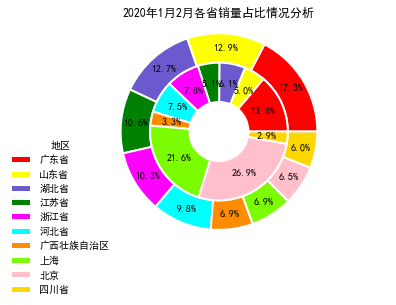

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
df1 = pd.read_excel('data2.xls')
df2=pd.read_excel('data2.xls',sheet_name='2月')
#数据集，x1,x2分别对应外环、内环百分比例
x1=df1['销量']
x2=df2['销量']
#设置饼状图各个区块的颜色
colors = ['red', 'yellow', 'slateblue', 'green','magenta','cyan','darkorange','lawngreen','pink','gold']
#外环
plt.pie(x1,autopct='%.1f%%',radius=1,pctdistance=0.85,colors=colors,wedgeprops=dict(linewidth=2,width=0.3,edgecolor='w'))
#内环
plt.pie(x2,autopct='%.1f%%',radius=0.7,pctdistance=0.7,colors=colors,wedgeprops=dict(linewidth=2,width=0.4,edgecolor='w'))
#图例
legend_text=df1['省']
plt.legend(legend_text,title='地区',frameon=False,bbox_to_anchor=(0.2,0.5))#设置图例标题、位置、去掉图例边框
plt.axis('equal')#设置坐标轴比例以显示为圆形
plt.title('2020年1月2月各省销量占比情况分析')


## 5  绘制散点图

散点图主要是用来查看数据的分布情况或相关性，一般用在线性回归分析中，查看数据点在坐标系平面上的分布情况。散点图表示因变量而变化的大致趋势，因此可以选择合适的函数对数据点进行拟合。

散点图与折线图类似，也是一个个点构成的，但不同之处在于，散点图的各点之间不会按照前后关系以线条连接起来。

Matplotlib绘制散点图使用plot函数和scatter函数都可以实现，本节使用scatter函数绘制散点图，scatter函数专门用于绘制散点图，使用方式和plot函数类似，区别在于前者具有更高的灵活性，可以单独控制使得每个散点与数据匹配，并让每个散点具有不同的属性。

scatter函数的语法如下：
matplotlib.pyplot.scatter(x,y,s=None,c=None,marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=None,linewidths=None,verts=None,edgecolors=None,data=None,******kwargs)

参数说明：
* x,y：数据
* s: 标记大小，以平方磅为单位的标记面积，设置如下：
    * 数值标量： 以相同的大小绘制所有标记
    * 行或列向量： 使每个标记具有不同的大小。x、y和sz中的相应元素确定每个标记的位置和面积。sz的长度必须等于x和y的长度。
    * []：使用36平方磅的默认面积。
* c: 标记颜色，可选参数，默认值为'b',表示蓝色
* marker: 标记样式，可选参数，默认值为‘o’.
* cmap: 颜色地图，可选参数，默认值为None。
* norm: 可选参数，默认值为None.
* vmin,vmax:标量，可选，默认值为None
* alpha:透明度，可选参数，0~1之间的数，表示透明度，默认值为None;
* linewidth:线宽，标记边缘的宽度，可选参数，默认值为None
* verts:(x,y)的序列，可选参数，如果参数marker为None，这些顶点将用于构建标记。标记的中心位于（0,0)为标准化单位。整体标记重新调整由参数s完成。
* edgecolors:轮廓颜色，和参数c类似，可选参数，默认值为None.
* data: data关键字参数。如果给定一个数据参数，所有的位置和关键字参数将被替换。
* **kwargs:关键字参数，其它可选参数。

绘制简单的散点图


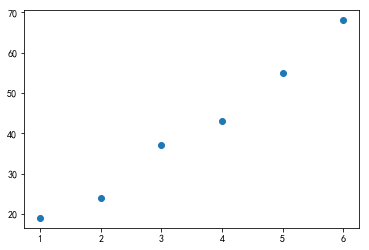

In [13]:
import  matplotlib.pyplot as plt
%matplotlib inline
x = [1,2,3,4,5,6]
y = [19,24,37,43,55,68]
plt.scatter(x,y)

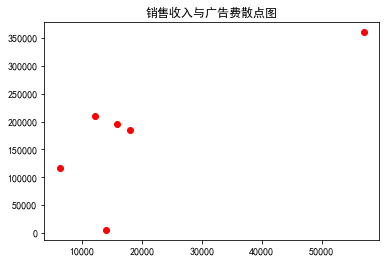

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
aa =r'JDdata.xls'
bb=r'JDcar.xls'
dfaa = pd.DataFrame(pd.read_excel(aa))
dfbb=pd.DataFrame(pd.read_excel(bb))
df1=dfaa[['业务日期','金额']]
df2=dfbb[['投放日期','支出']]
#去除空日期和金额为0的记录
df1=df1[df1['业务日期'].notnull() & df1['金额'] !=0]
df2=df2[df2['投放日期'].notnull() & df2['支出'] !=0]
df1['业务日期'] = pd.to_datetime(df1['业务日期'])
df2['投放日期'] = pd.to_datetime(df2['投放日期'])
dfData = df1.set_index('业务日期',drop=True)
dfCar=df2.set_index('投放日期',drop=True)
# 按月度统计并显示销售金额
dfData_month=dfData.resample('M').sum().to_period('M')
# 按月度统计并显示广告费支出金额
dfCar_month=dfCar.resample('M').sum().to_period('M')
#x为广告费用，y为销售收入
x=pd.DataFrame(dfCar_month['支出'])
y=pd.DataFrame(dfData_month['金额'])
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文乱码
plt.title('销售收入与广告费散点图')   #图表标题
plt.scatter(x, y,  color='red') #真实值散点图

## 6 绘制面积图

面积图用于体现数量随时间而变化的程序，也可用于引起人们对总值趋势的注意。例如，表示随时间而变化的利润的数据，可以绘制在面积图中以强调总利润。

Matplotlib.pyplot.stackplot(x, *** *args,data=None,*****kwargs)

参数说明:
* x:x轴数据
* args： 当传入的参数个数未知时，使用args.这里指y轴数据中可以传入多个y轴。
* data: data关键字参数。如果给定一个数据参数，所有位置和关键字参数将被替换。
* kwargs: 关键字参数，其它可选参数，如color(颜色)、alpha(透明度)等

绘制简单的面积图

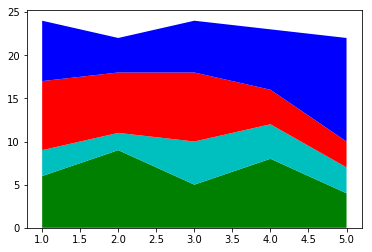

In [2]:
import  matplotlib.pyplot as plt
%matplotlib inline
x = [1,2,3,4,5]
y1 = [6,9,5,8,4]
y2 = [3,2,5,4,3]
y3 = [8,7,8,4,3]
y4 = [7,4,6,7,12]

plt.stackplot(x,y1,y2,y3,y4,colors=['g','c','r','b'])


面积图也有很多，如标准面积图、堆叠面积图和百分比堆叠面积图等。

### 6.1 标准面积图

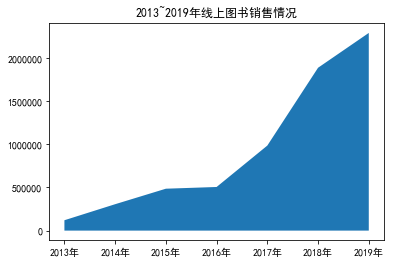

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx')
plt.rcParams['font.sans-serif'] = ['SimHei']
x = df['年份']
y = df['销售额']
plt.title('2013~2019年线上图书销售情况')
plt.stackplot(x,y)


### 6.2 堆叠面积图

实现堆叠面积图的关键在于增加y轴，通过增加多个y轴数据，形成堆叠面积图

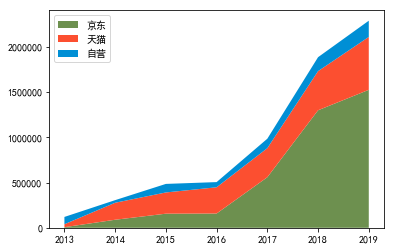

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx',sheet_name='Sheet2')
plt.rcParams['font.sans-serif'] = ['SimHei']
x = df['年份']
y1 = df['京东']
y2 = df['天猫']
y3 = df['自营']

plt.stackplot(x,y1,y2,y3,colors=['#6d904f','#fc4f30','#008fd5'])
plt.legend(['京东','天猫','自营'],loc='upper left')

## 7 绘制多个子图表

Matplotlib可以实现在一张图上绘制多个子图表。Matplotlib提供了三种方法：
* 使用subplot函数
* 使用subplots函数
* 使用add_subplot函数

### 7.1 subplot函数

subplot函数直接指定划分方式和位置，它可以将一个绘图区分为n个子图，每个subplot函数只能绘制一个子图。

语法如下：matplotlib.pyplot.subplot(****args,*******kwargs)

参数说明：
* args:当传入的参数个数未知时使用args
* kwargs:关键字参数，其它可选参数。

例如：绘制一个2X3的区域，subplot(2,3,3),将画布分成2行3列在第3个区域中绘制，用坐标表示如下：

（1，1），（1，2），（1，3）

（2，1），（2，2），（2，3）

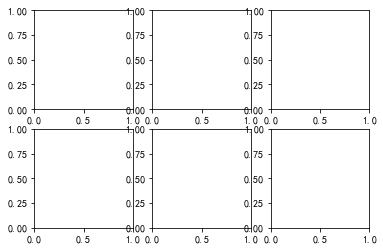

In [14]:
#绘制一个2X3包含6个子图的空图表
import matplotlib.pyplot as plt
plt.subplot(2,3,1)
plt.subplot(2,3,2)
plt.subplot(2,3,3)
plt.subplot(2,3,4)
plt.subplot(2,3,5)
plt.subplot(2,3,6)

绘制包含多个子图的图表


<BarContainer object of 6 artists>

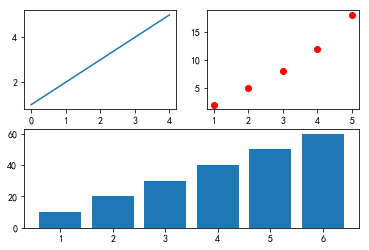

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#第1个子图图表-折线图
plt.subplot(2,2,1)
plt.plot([1,2,3,4,5])
# 第2个子图表-散点图
plt.subplot(2,2,2)
plt.plot([1,2,3,4,5],[2,5,8,12,18],'ro')
#第3个子图表-柱形图
plt.subplot(2,1,2) # 把画布分成2行1列，由于第1行已经占用。第2行也就是第3个子图绘制柱形图
x = [1,2,3,4,5,6]
height = [10,20,30,40,50,60]
plt.bar(x,height)


两个关键点一定要掌握：
* (1) 每绘制一个子图表都要调用一次subplot函数
* (2) 绘图区域的位置编号。

subplot函数的前面两个参数指定的是一个画布被分割成的行数和列数，后面一个参数则指的是当前绘制区域的位置编号，编号规则是行优先。

### 7.2 subplots函数

subplots函数用于创建画布和子图，语法如下：
matplotlib.pyplot.subplots(nrows,ncols,sharex,sharey,squeeze,subplot_kw,gridspec_kw,******fig_kw)

参数如下：
* nrows和ncols：表示将画布分割成几行几列
* sharex和sharey: 表示坐标轴的属性是否相同，可选的参数：True，False,row,col
* squeeze:布尔型，默认值为True
* subplot_kw:字典类型，可选参数。
* gridspec_kw:字典类型，可选参数
* fig_kw: 把所有详细的关键字参数传给figure.

使用subplots函数绘制多子图的空图表



C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


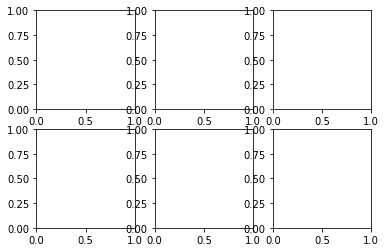

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

figure, axes = plt.subplots(2,3)


* figure:绘制图表的画布
* axes：坐标轴对象，可以理解为在figure(画布)上绘图坐标轴对象，它帮我们规划出了一个个科学作图的坐标轴系统。

使用subplots函数绘制多子图图表

([<matplotlib.patches.Wedge at 0x179fdc566a0>,
 [Text(1.0978294013681003, 0.06906956994045162, ''),
  Text(1.056323054388303, 0.3068902161486517, ''),
  Text(0.7530018217768821, 0.8018654852284746, ''),
  Text(-1.065441491584454, -0.2735588200191946, ''),
  Text(0.8899186347901604, -0.6465638587589142, ''),
  Text(1.056323029246806, -0.30689030268623974, '')],
 [Text(0.5988160371098727, 0.03767431087660997, '2.0%'),
  Text(0.5761762114845289, 0.16739466335380998, '5.0%'),
  Text(0.4107282664237538, 0.43738117376098606, '12.0%'),
  Text(-0.5811499045006112, -0.1492139018286516, '70.0%'),
  Text(0.48541016443099655, -0.3526711956866804, '2.0%'),
  Text(0.5761761977709849, -0.16739471055613073, '9.0%')])

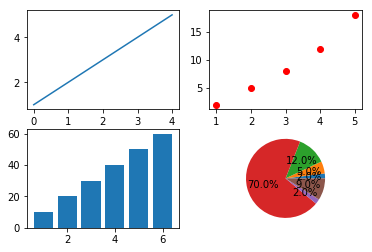

In [2]:
import matplotlib.pyplot as plt
figure,axes = plt.subplots(2,2)
axes[0,0].plot([1,2,3,4,5])# 第1个子图表-折线图
axes[0,1].plot([1,2,3,4,5],[2,5,8,12,18],'ro') #第2个子图表-散点图
#第3个子图表-柱形图
x = [1,2,3,4,5,6]
height = [10,20,30,40,50,60]
axes[1,0].bar(x,height)
#第4个子图表-饼形图
x = [2,5,12,70,2,9]
axes[1,1].pie(x,autopct='%1.1f%%')



### 7.3 add_subplot函数

add_subplot函数也可以实现在一张图上绘制多个子图表，用法与subplot函数基本相同。

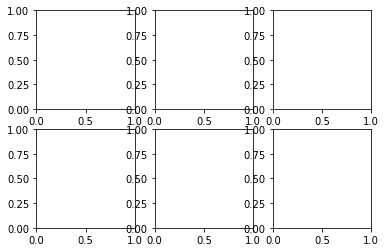

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


<BarContainer object of 6 artists>

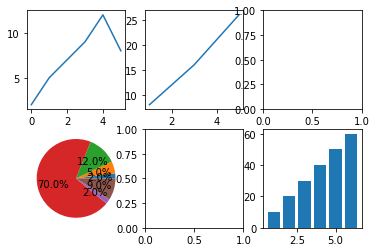

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax1.plot([2,5,7,9,12,8])
ax2 = fig.add_subplot(2,3,2)
ax2.plot([1,2,3,4,5],[8,12,16,21,26])
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
x = [2,5,12,70,2,9]
ax4.pie(x,autopct='%1.1f%%')
ax5= fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
x = [1,2,3,4,5,6]
height = [10,20,30,40,50,60]
ax6.bar(x,height)


## 8 图表的保存

Matplotlib的savefig函数可以实现这一功能，将图表保存为JPEG、TIFF或PNG格式的图片。

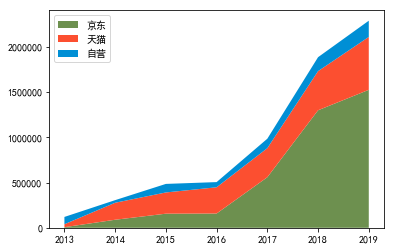

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('books.xlsx',sheet_name='Sheet2')
plt.rcParams['font.sans-serif'] = ['SimHei']
x = df['年份']
y1 = df['京东']
y2 = df['天猫']
y3 = df['自营']

plt.stackplot(x,y1,y2,y3,colors=['#6d904f','#fc4f30','#008fd5'])
plt.legend(['京东','天猫','自营'],loc='upper left')
plt.savefig('image.png')

需要注意的一个关键问题：保存代码必须在图表预览前，也就是plt.show方法前，否则保存后的图片是白色，图表无法保存。运行程序，图表被保存在程序所在路径下，名称为image.png